# Predicting Diabetes

## Import Libraries

In [2]:
import pandas as pd                  # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import numpy as np                   # numpy provides N-dim object support

# do plotting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [3]:
df = pd.read_csv("./downloads/pima-data.csv")    # load Pima data. Adjust path as necessary

In [4]:
df.shape

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


# Check for null values

In [7]:
df.isnull().values.any()


False

In [8]:
corr = df.corr()
print(corr)   

              num_preg  glucose_conc  diastolic_bp  thickness   insulin  \
num_preg      1.000000      0.129459      0.141282  -0.081672 -0.073535   
glucose_conc  0.129459      1.000000      0.152590   0.057328  0.331357   
diastolic_bp  0.141282      0.152590      1.000000   0.207371  0.088933   
thickness    -0.081672      0.057328      0.207371   1.000000  0.436783   
insulin      -0.073535      0.331357      0.088933   0.436783  1.000000   
bmi           0.017683      0.221071      0.281805   0.392573  0.197859   
diab_pred    -0.033523      0.137337      0.041265   0.183928  0.185071   
age           0.544341      0.263514      0.239528  -0.113970 -0.042163   
skin         -0.081672      0.057328      0.207371   1.000000  0.436783   
diabetes      0.221898      0.466581      0.065068   0.074752  0.130548   

                   bmi  diab_pred       age      skin  diabetes  
num_preg      0.017683  -0.033523  0.544341 -0.081672  0.221898  
glucose_conc  0.221071   0.137337  0.26351

In [9]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 -------------------->
                                                Expect a darkred line running from top left to bottom right
    """
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y tick marks

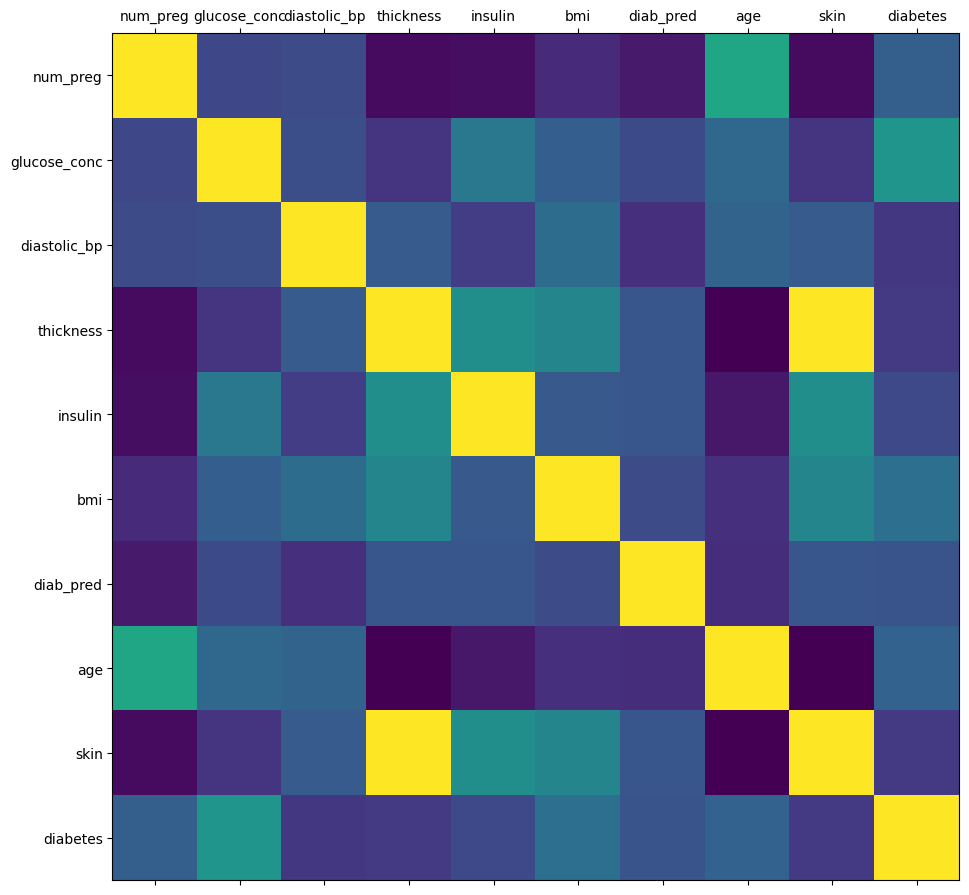

In [10]:
plot_corr(df)

df.head()

In [11]:
del df['skin']

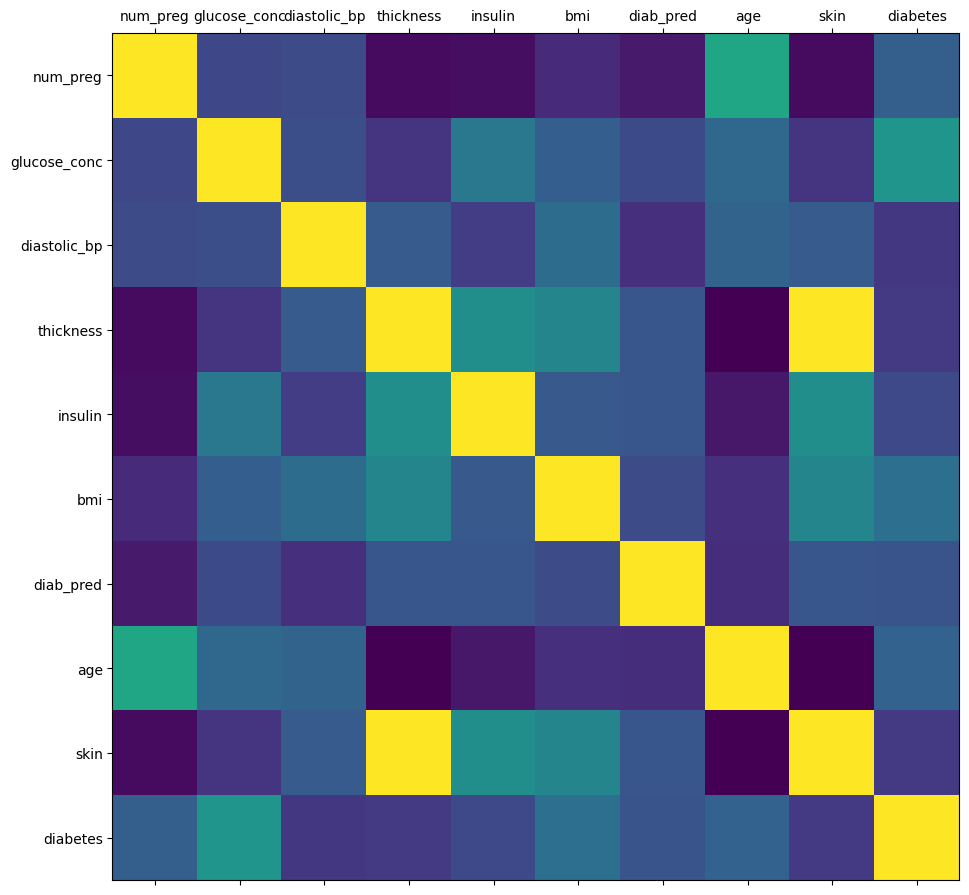

In [12]:
plot_corr(df)

## Check Data Types

Change True to 1, False to 0

In [13]:
diabetes_map = {True : 1, False : 0}

In [14]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [15]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [16]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false))* 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false))* 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


Good distribution of true and false cases. No special work needed.

### Spliting the data

70% for training, 30% for testing

In [17]:
import sklearn
print(sklearn.__version__)

1.3.0


In [18]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values       #predictor feature columns (8 x m)
y = df[predicted_class_names].values   #predicted class (1=true 0=false) column (1 x m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
                                # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we hae the desired 70% train, 30% test split of the data

In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


#### Verifying predicted value was split correctly

## Post-split Data Preparation

#### Hidden Missing Values

In [20]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have unexpected 0 values?

#### Impute with the mean

In [24]:
from sklearn.impute import SimpleImputer

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values = 0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

### Performance on Training Data

In [26]:
#predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



In [29]:
#predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7359


#### Metrics

In [30]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)        # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [34]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


In [36]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7403


In [38]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7403
Confusion Matrix
[[125  26]
 [ 32  48]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



C:\Users\Derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Setting regularization parameter

C:\Users\Derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

1st max value of 0.600 occured at C=0.100


C:\Users\Derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Text(0, 0.5, 'recall score')

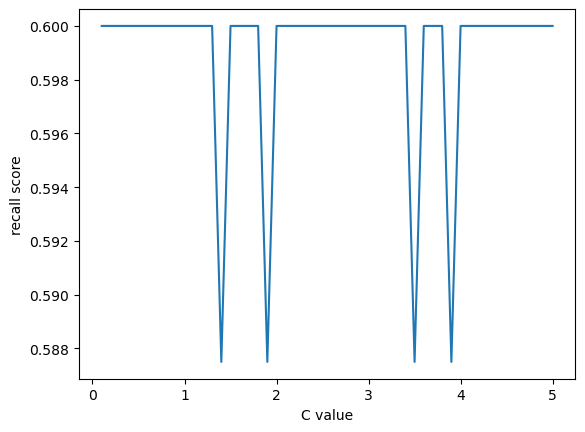

In [42]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")